In [1]:
import numpy as np
import matplotlib.pyplot as plt

The convolution of two functions $f$ and $g$ is given by

$$
f \star g (x) = \int_{-\infty}^{\infty}f(t)g(x-t)dt
$$

The easiest way to think of this is as the response of a linear time-invariant system to an input function. Take one of the functions (say $f(x)$) as the input and the other ($g(x)$) as the impulse response. Then the convolution is the sum of an infinite number of shifted and scaled copies of $g$ - shifted by $t$ and scaled by $f(t)dt$.

That is: look at the value of $f$ at $t$ and treat it as an impulse input. Then shift $g(x)$ forward by $t$ - this gives $g(x-t)$ - and multiply it by $f(t)$. This is the response of the system to the input at $t$. Integrating this over $t$ gives the complete response of the system to the input.

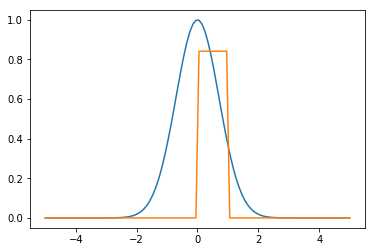

In [160]:
# Let f be the input and g be the impulse response

x = np.linspace(-5, 5, 100)
f = lambda y: np.exp(-y**2)
g = lambda x: np.sin((x > 0) & (x < 1))

plt.plot(x, f(x))
plt.plot(x, g(x))

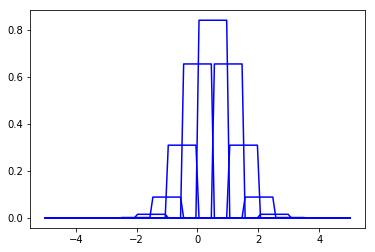

In [161]:
# Plotting the responses of the system at different times
# you can see the shifted and scaled copies of g

dx = 0.1
n = 20

for i in range(n):
    t = -5 + i * 100/n * dx
    plt.plot(x, f(t)*g(x-t), c='blue')

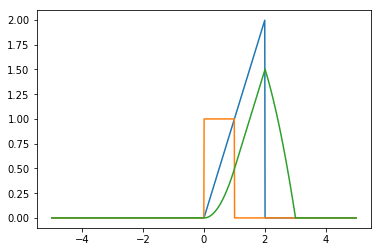

In [166]:
# Another example of convolution

f = np.vectorize(lambda x: x if 0.0 < x < 2.0 else 0.0)
g = np.vectorize(lambda x: 1 if 0.0 < x < 1.0 else 0.0)

x = np.linspace(-5, 5, 1000)

plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(x, np.convolve(f(x), g(x), mode='same')/100)

Each point on the green curve (the convolution) represents the integral from 1 unit before that point to that point. It peaks at the same point that the input reaches its maximum, and then gradually drops off to zero over the next 1 unit.